<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_beetles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')

Loading required package: gsheet



In [2]:
url <- 'https://docs.google.com/spreadsheets/d/1GBuO6EuGQT2uQz10UFiijwtyCrA2tY7YTot7HotUnsM/edit?usp=sharing'
beetles <- gsheet2tbl(url)
#head(beetles)

In [3]:
beetles

dose,number,killed
<dbl>,<dbl>,<dbl>
1.6907,59,6
1.7242,60,13
1.7552,62,18
1.7842,56,28
1.8113,63,52
1.8369,59,53
1.8610,62,61
1.8839,60,60


In [4]:
beetles$propkilled <- beetles$killed/beetles$number

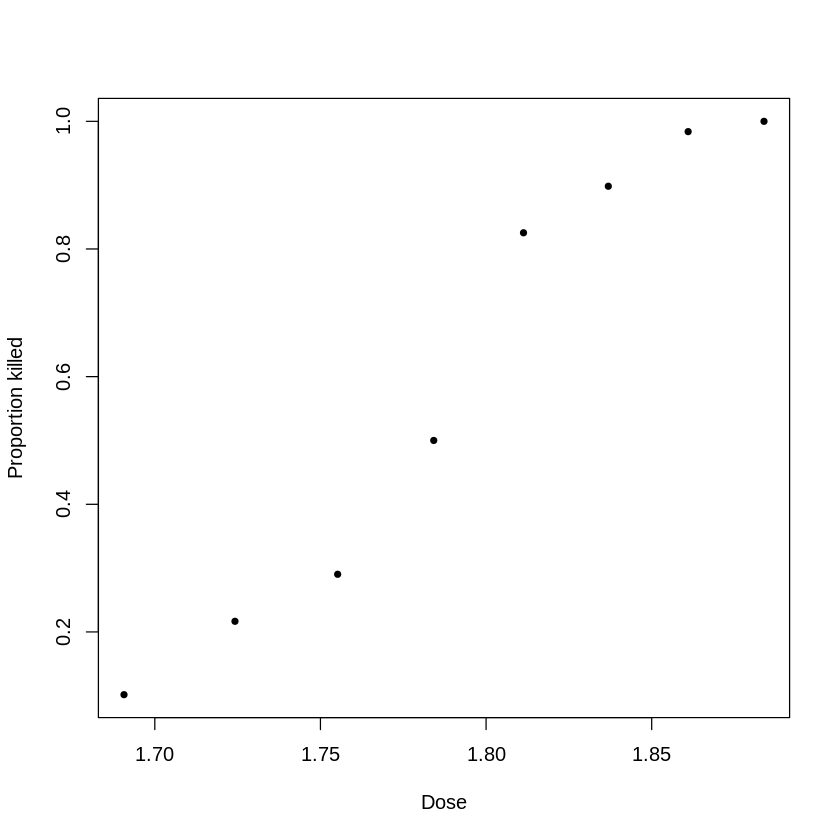

In [5]:
# png("beetles.png", width = 7, height = 5.5, units="in", res=1024)
plot(beetles$dose, beetles$propkilled, xlab="Dose" , ylab="Proportion killed", pch=20)
# dev.off()

In [6]:
beetles.mat <- cbind(beetles$killed, beetles$number-beetles$killed)

In [7]:
# Logistic model:
m1 <- glm( beetles.mat~ beetles$dose,family=binomial(link='logit'))
summary(m1)


Call:
glm(formula = beetles.mat ~ beetles$dose, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5941  -0.3944   0.8329   1.2592   1.5940  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -60.717      5.181  -11.72   <2e-16 ***
beetles$dose   34.270      2.912   11.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.202  on 7  degrees of freedom
Residual deviance:  11.232  on 6  degrees of freedom
AIC: 41.43

Number of Fisher Scoring iterations: 4


In [8]:
# Other link functions:
# probit:
m2 <- glm( beetles.mat~ beetles$dose,family=binomial(link='probit'))
summary(m2)


Call:
glm(formula = beetles.mat ~ beetles$dose, family = binomial(link = "probit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5714  -0.4703   0.7501   1.0632   1.3449  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -34.935      2.648  -13.19   <2e-16 ***
beetles$dose   19.728      1.487   13.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.20  on 7  degrees of freedom
Residual deviance:  10.12  on 6  degrees of freedom
AIC: 40.318

Number of Fisher Scoring iterations: 4


In [9]:
# complementary log-log:
m3 <- glm( beetles.mat~ beetles$dose,family=binomial(link='cloglog'))
summary(m3)


Call:
glm(formula = beetles.mat ~ beetles$dose, family = binomial(link = "cloglog"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.80329  -0.55135   0.03089   0.38315   1.28883  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -39.572      3.240  -12.21   <2e-16 ***
beetles$dose   22.041      1.799   12.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.2024  on 7  degrees of freedom
Residual deviance:   3.4464  on 6  degrees of freedom
AIC: 33.644

Number of Fisher Scoring iterations: 4


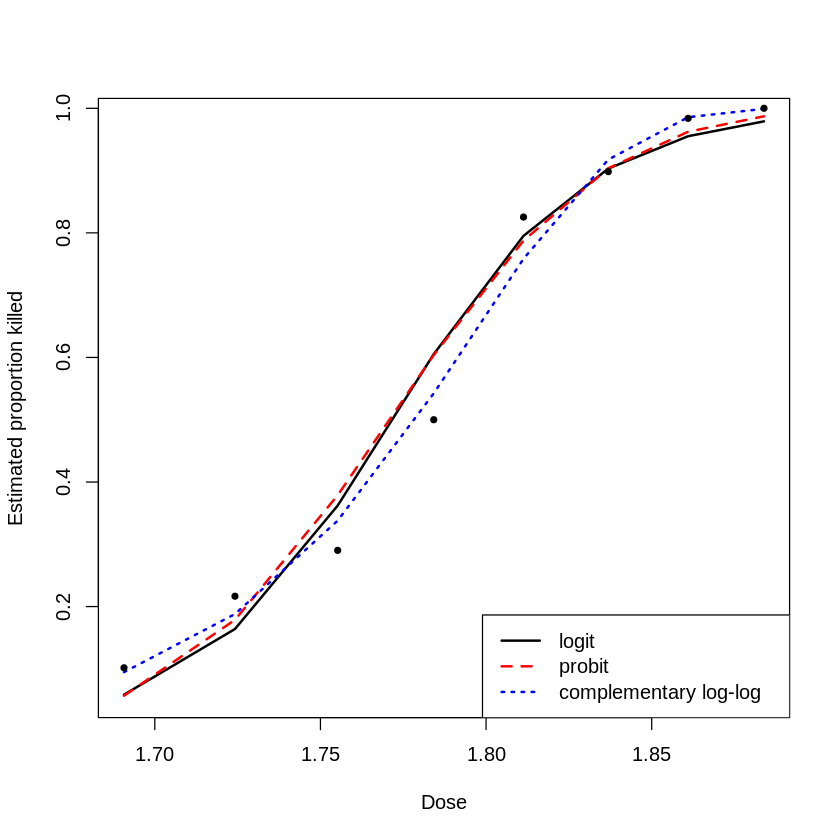

In [10]:
# Plot of the fitted values for each of the three models
# png("beetlefvals.png", width = 7, height = 5.5, units="in", res=1024)
plot(beetles$dose, fitted(m1), xlab="Dose" , ylab="Estimated proportion killed", type="l", lwd=2)
lines(beetles$dose, fitted(m2), lty=2, col="red", lwd=2)
lines(beetles$dose, fitted(m3), lty=3, col="blue", lwd=2)
points(beetles$dose, beetles$propkilled, pch=20)
legend("bottomright", lty=1:3, col=c("black", "red", "blue"), lwd=2, legend=c("logit", "probit", "complementary log-log"))

# dev.off()